# Проектная работа по модулю “Препроцессинг данных”


## 1+. Загрузить файл data_breast.csv. В данном файле собрана расчетная информация с обработанных изображений
биоптата молочных желез женщин. Задача заключается в предсказании переменной “Diagnosis” - является ли
содержимое биоптата доброкачественным (значение “B” – benign) либо злокачественным (значение “M” –
malicious). 
Описание данных доступно на сайте 
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats

In [2]:
! ls

 data_breast.csv  ' project preprocessing.ipynb'   project_preprocessing.pdf


In [3]:
path='data_breast.csv'

In [4]:
#df=pd.read_csv(path)
df=pd.read_csv('data_breast.csv')

## 2+. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение).

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
#df.describe(percentiles=[.25, .5, .75])
df.describe(percentiles=[.5])

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
#'50%' - медиана

In [7]:
#мода
df.mode().head(1)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,8670,B,12.34,14.93,82.61,512.2,0.1007,0.1147,0.0,0.0,...,17.7,101.7,284.4,0.1216,0.1486,0.0,0.0,0.2226,0.07427,NaN


## 3. Выбрать стратегию для работы с пропущенными значениями.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [9]:
df['Unnamed: 32'].unique()#.values()


array([nan])

In [ ]:
#пропущенные значения только в последней колонке - удаляем ее.

In [10]:
df.drop(columns=['Unnamed: 32'], inplace=True)#('Unnamed: 32')

In [11]:
df['target']=df['diagnosis'].apply(lambda x: 1 if  x=='M' else 0)

In [12]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [13]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [14]:
df['target'].value_counts()

0    357
1    212
Name: target, dtype: int64

In [16]:
tr_l=int(0.80*(212+357))
te_l=len(df)-tr_l
print(te_l, tr_l, len(df))

114 455 569


In [17]:
print(df['target'].mean(), df['target'].head(455).mean(), df['target'].tail(114).mean())

0.37258347978910367 0.4087912087912088 0.22807017543859648


In [18]:
#norm_df=(df.drop(columns=['diagnosis'])-df.mean())/df.std()
norm_df=(df.drop(columns=['diagnosis'])-df.drop(columns=['diagnosis']).min()) / \
    (df.drop(columns=['diagnosis']).max()-df.drop(columns=['diagnosis']).min())
#norm_df=(df-df.mean())/df.std

In [19]:
print(df.mean().shape)

(32,)


In [20]:
print(df.min().shape)

(33,)


In [21]:
norm_df.head().T

,0,1,2,3,4
id,0.000915,0.000915,0.092495,0.092547,0.092559
radius_mean,0.521037,0.643144,0.601496,0.210090,0.629893
texture_mean,0.022658,0.272574,0.390260,0.360839,0.156578
perimeter_mean,0.545989,0.615783,0.595743,0.233501,0.630986
area_mean,0.363733,0.501591,0.449417,0.102906,0.489290
smoothness_mean,0.593753,0.289880,0.514309,0.811321,0.430351
compactness_mean,0.792037,0.181768,0.431017,0.811361,0.347893
concavity_mean,0.703140,0.203608,0.462512,0.565604,0.463918
concave points_mean,0.731113,0.348757,0.635686,0.522863,0.518390
symmetry_mean,0.686364,0.379798,0.509596,0.776263,0.378283


In [22]:
norm_df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.033318,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,...,0.363998,0.283138,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596,0.372583
std,0.137187,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,...,0.163813,0.167352,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466,0.483918
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000944,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,...,0.241471,0.167837,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700,0.000000
50%,0.000985,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,...,0.356876,0.235320,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977,0.000000
75%,0.009661,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,...,0.471748,0.373475,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 4. Рассчитать и визуализировать корреляционную матрицу для переменных.

In [23]:
corr=norm_df.corr()

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15.7, 12.27) )        # Sample figsize in inches

sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [45]:
# есть корреляция между некоторыми фичами, но в матрице слишком много переменных
co=0
cor=[]
for i in norm_df.columns:
    for j in norm_df.columns:
        i_ind=norm_df.columns.searchsorted(i)
        j_ind=norm_df.columns.searchsorted(j)
        if abs(norm_df[i].corr(norm_df[j]))>0.6 and i_ind>j_ind : #and i!='target'
            cor.append([i_ind, i, j_ind, j, norm_df[i].corr(norm_df[j])])
            co=co+1

co


81

In [25]:
#type(norm_df.columns)
cor

[[31, 'radius_mean', 0, 'area_mean', 0.9873571700566124],
 [31, 'radius_mean', 29, 'concavity_mean', 0.6767635503908117],
 [31, 'radius_mean', 27, 'concave points_mean', 0.8225285223871796],
 [31, 'radius_mean', 5, 'area_se', 0.7358636632128175],
 [31, 'radius_mean', 5, 'area_worst', 0.9410824595860467],
 [31, 'radius_mean', 27, 'concave points_worst', 0.7442141978674667],
 [31, 'perimeter_mean', 0, 'area_mean', 0.9865068039913901],
 [31, 'perimeter_mean', 29, 'concavity_mean', 0.7161356501174044],
 [31, 'perimeter_mean', 27, 'concave points_mean', 0.8509770412528199],
 [31, 'perimeter_mean', 5, 'area_se', 0.7449826941190679],
 [31, 'perimeter_mean', 5, 'area_worst', 0.9415498080023067],
 [31, 'perimeter_mean', 27, 'concave points_worst', 0.7712407893605489],
 [31, 'smoothness_mean', 5, 'compactness_mean', 0.6591232152159227],
 [29, 'concavity_mean', 0, 'area_mean', 0.6859828285519113],
 [29, 'concavity_mean', 5, 'compactness_mean', 0.883120670177251],
 [29, 'concavity_mean', 27, 'conc

In [ ]:
Из линейной регресси выбросим линейно-зависимые признаки :
    
    'area_mean', 'compactness_mean', 'area_worst', 'compactness_worst', 'concave points_se', 'area_se',
    'radius_worst',  'perimeter_worst', 'perimeter_se', 
    'concave points_mean', 
    'texture_mean', 'radius_mean',
    'concavity_worst', 
    'concavity_mean', 
    'compactness_worst', 'concavity_se', 'fractal_dimension_se',
    'perimeter_mean', 'fractal_dimension_mean', 'smoothness_mean', 'symmetry_mean'
    
[  [31, 'target', 27, 'concave points_worst', 0.79356601714127],
[31, 'target', 27, 'concave points_mean', 0.7766138400204355],    - 
  [31, 'target', 5, 'area_worst', 0.733825034921051],      -
 [31, 'target', 0, 'area_mean', 0.7089838365853902],      -
 [31, 'target', 29, 'concavity_mean', 0.6963597071719058],
 [31, 'target', 29, 'concavity_worst', 0.6596102103692331],
 
    [31, 'radius_mean', 0, 'area_mean', 0.9873571700566125],
 [31, 'radius_mean', 29, 'concavity_mean', 0.6767635503908117],
 [31, 'radius_mean', 27, 'concave points_mean', 0.8225285223871798],
 [31, 'radius_mean', 5, 'area_se', 0.7358636632128177],
 [31, 'radius_mean', 5, 'area_worst', 0.941082459586047],
 [31, 'radius_mean', 27, 'concave points_worst', 0.7442141978674666],
 
 [31, 'perimeter_mean', 0, 'area_mean', 0.9865068039913905],
 [31, 'perimeter_mean', 29, 'concavity_mean', 0.7161356501174043],
 [31, 'perimeter_mean', 27, 'concave points_mean', 0.85097704125282],
 [31, 'perimeter_mean', 5, 'area_se', 0.7449826941190679],
 [31, 'perimeter_mean', 5, 'area_worst', 0.9415498080023069],
 [31, 'perimeter_mean', 27, 'concave points_worst', 0.7712407893605491],
 
 [31, 'smoothness_mean', 5, 'compactness_mean', 0.6591232152159225],
 
 [29, 'concavity_mean', 0, 'area_mean', 0.6859828285519113],
 [29, 'concavity_mean', 5, 'compactness_mean', 0.8831206701772509],
 [29, 'concavity_mean', 27, 'concave points_mean', 0.9213910263788595],
 [29, 'concavity_mean', 5, 'area_se', 0.6174268058452413],
 [29, 'concavity_mean', 7, 'compactness_se', 0.6702788246430204],
 [29, 'concavity_mean', 27, 'concave points_se', 0.6832599165123265],
 [29, 'concavity_mean', 5, 'area_worst', 0.6759872313060885],
 [29, 'concavity_mean', 25, 'compactness_worst', 0.7549680159063968],
 [29, 'concavity_mean', 27, 'concave points_worst', 0.8613230336379513],
 
 
 !!! 2
 [27, 'concave points_mean', 0, 'area_mean', 0.8232688686524334],
 [27, 'concave points_mean', 5, 'compactness_mean', 0.8311350431336989],
 [27, 'concave points_mean', 5, 'area_se', 0.6902985397595531],
 [27, 'concave points_mean', 5, 'area_worst', 0.8096296199096182],
 [27, 'concave points_mean', 25, 'compactness_worst', 0.6674536768257119],
 
 [31, 'symmetry_mean', 5, 'compactness_mean', 0.6026410484055156],
 
 [31, 'radius_se', 0, 'area_mean', 0.732562226997297],
 [31, 'radius_se', 29, 'concavity_mean', 0.6319248221414906],
 [31, 'radius_se', 27, 'concave points_mean', 0.6980498335607407],
 [31, 'radius_se', 5, 'area_se', 0.9518301121109902],
 [31, 'radius_se', 5, 'area_worst', 0.7515484761266203],
 
 [31, 'perimeter_se', 0, 'area_mean', 0.7266283277906844],
 [31, 'perimeter_se', 29, 'concavity_mean', 0.660390787241962],
 [31, 'perimeter_se', 27, 'concave points_mean', 0.7106498716138985],
 [31, 'perimeter_se', 5, 'area_se', 0.9376554069544157],
 
 [31, 'perimeter_se', 5, 'area_worst', 0.7307129731302829],
 
 [5, 'area_se', 0, 'area_mean', 0.8000859212343205],
 
 [7, 'compactness_se', 5, 'compactness_mean', 0.7387217896603927],
 
 [29, 'concavity_se', 7, 'compactness_se', 0.801268342738329],
 [29, 'concavity_se', 27, 'concave points_se', 0.7718039949238454],
 
 [27, 'concave points_se', 5, 'compactness_mean', 0.6422618509716465],
 [27, 'concave points_se', 7, 'compactness_se', 0.7440826676953246],
 
 [29, 'fractal_dimension_se', 7, 'compactness_se', 0.803268817661767],
 [29, 'fractal_dimension_se', 27, 'concave points_se', 0.6110441393807226],
 
 [31, 'radius_worst', 0, 'area_mean', 0.9627460860470834],
 [31, 'radius_worst', 29, 'concavity_mean', 0.6882364076436728],
 [31, 'radius_worst', 27, 'concave points_mean', 0.8303176311186153],
 [31, 'radius_worst', 5, 'area_se', 0.757373188924016],
 [31, 'radius_worst', 5, 'area_worst', 0.9840145644590741],
 [31, 'radius_worst', 27, 'concave points_worst', 0.7874238517122413],
 
 [31, 'perimeter_worst', 0, 'area_mean', 0.9591195743552653],
 [31, 'perimeter_worst', 29, 'concavity_mean', 0.7295649165132025],
 [31, 'perimeter_worst', 27, 'concave points_mean', 0.8559231281343108],
 [31, 'perimeter_worst', 5, 'area_se', 0.7612126360687588],
 [31, 'perimeter_worst', 5, 'area_worst', 0.9775780914063881],
 [31, 'perimeter_worst', 29, 'concavity_worst', 0.618344079533516],
 [31, 'perimeter_worst', 27, 'concave points_worst', 0.8163221016875446],
 
 [5, 'area_worst', 0, 'area_mean', 0.9592133256499],
 
 [31, 'smoothness_worst', 29, 'fractal_dimension_worst', 0.6176241916554382],
 
 [25, 'compactness_worst', 5, 'compactness_mean', 0.8658090398022632],
 [25, 'compactness_worst', 7, 'compactness_se', 0.6787803543724954],
 
 [29, 'concavity_worst', 5, 'compactness_mean', 0.8162752498000289],
 [29, 'concavity_worst', 27, 'concave points_mean', 0.7523994975749646],
 [29, 'concavity_worst', 7, 'compactness_se', 0.6391466977559195],
 [29, 'concavity_worst', 25, 'compactness_worst', 0.8922608987764691],
 [29, 'concavity_worst', 27, 'concave points_worst', 0.855433860343999],
 
 !!!! No 1
 [27, 'concave points_worst', 0, 'area_mean', 0.7220166262603581],
 [27, 'concave points_worst', 5, 'compactness_mean', 0.8155732235690647],
 [27, 'concave points_worst', 5, 'area_worst', 0.7474188023228179],
 [27, 'concave points_worst', 25, 'compactness_worst', 0.801080364635253],
 
 [31, 'symmetry_worst', 25, 'compactness_worst', 0.6144405011493062],
 
 [29, 'fractal_dimension_worst', 5, 'compactness_mean', 0.6873823227538968],
 [29, 'fractal_dimension_worst', 25, 'compactness_worst', 0.8104548563116121],]


In [26]:
predictors=[]
to_exclude=['area_mean', 'compactness_mean', 'area_worst', 'compactness_worst', 'concave points_se', 'area_se',
    'radius_worst',  'perimeter_worst', 'perimeter_se', 
    'concave points_mean', 
    'texture_mean', 'radius_mean',
    'concavity_worst', 
    'concavity_mean', 
    'compactness_worst', 'concavity_se', 'fractal_dimension_se',
    'perimeter_mean', 'fractal_dimension_mean', 'smoothness_mean', 'symmetry_mean', 'fractal_dimension_worst'
    ]
for i in norm_df.columns:
    if i not in to_exclude:
        predictors.append(i)

In [27]:
len(predictors)
predictors

['id',
 'radius_se',
 'texture_se',
 'smoothness_se',
 'compactness_se',
 'symmetry_se',
 'texture_worst',
 'smoothness_worst',
 'concave points_worst',
 'symmetry_worst',
 'target']

In [30]:
norm_sh=norm_df[predictors]

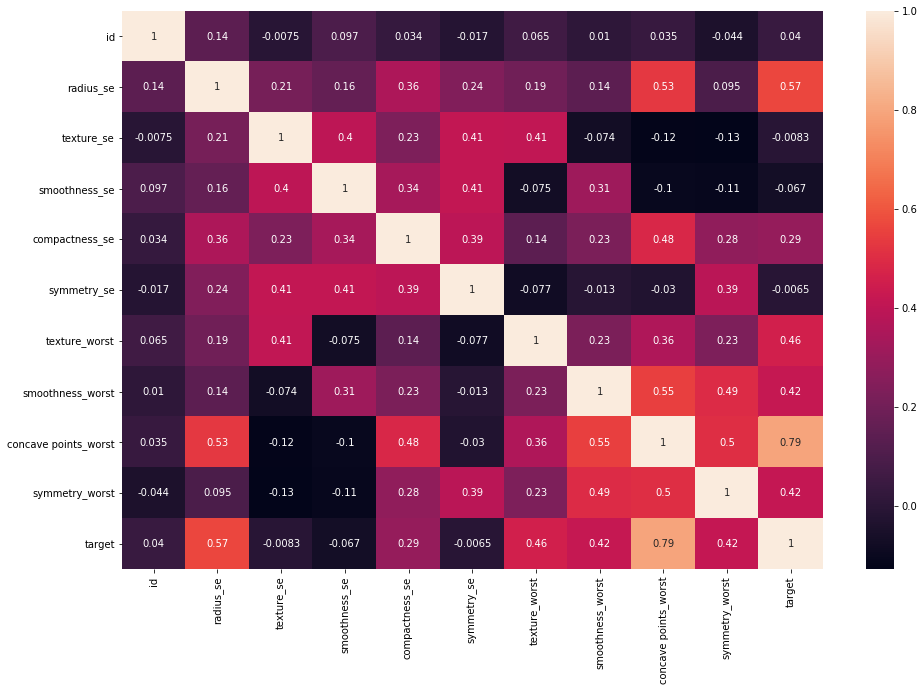

In [28]:
corr_short=norm_df[predictors].corr()

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15.7, 10.27) )        # Sample figsize in inches

sns.heatmap(corr_short, annot=True,
            xticklabels=corr_short.columns.values,
            yticklabels=corr_short.columns.values)

## 5. Визуализировать взаимосвязи между переменными.

/home/arseny/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/arseny/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


<function matplotlib.pyplot.show(*args, **kw)>

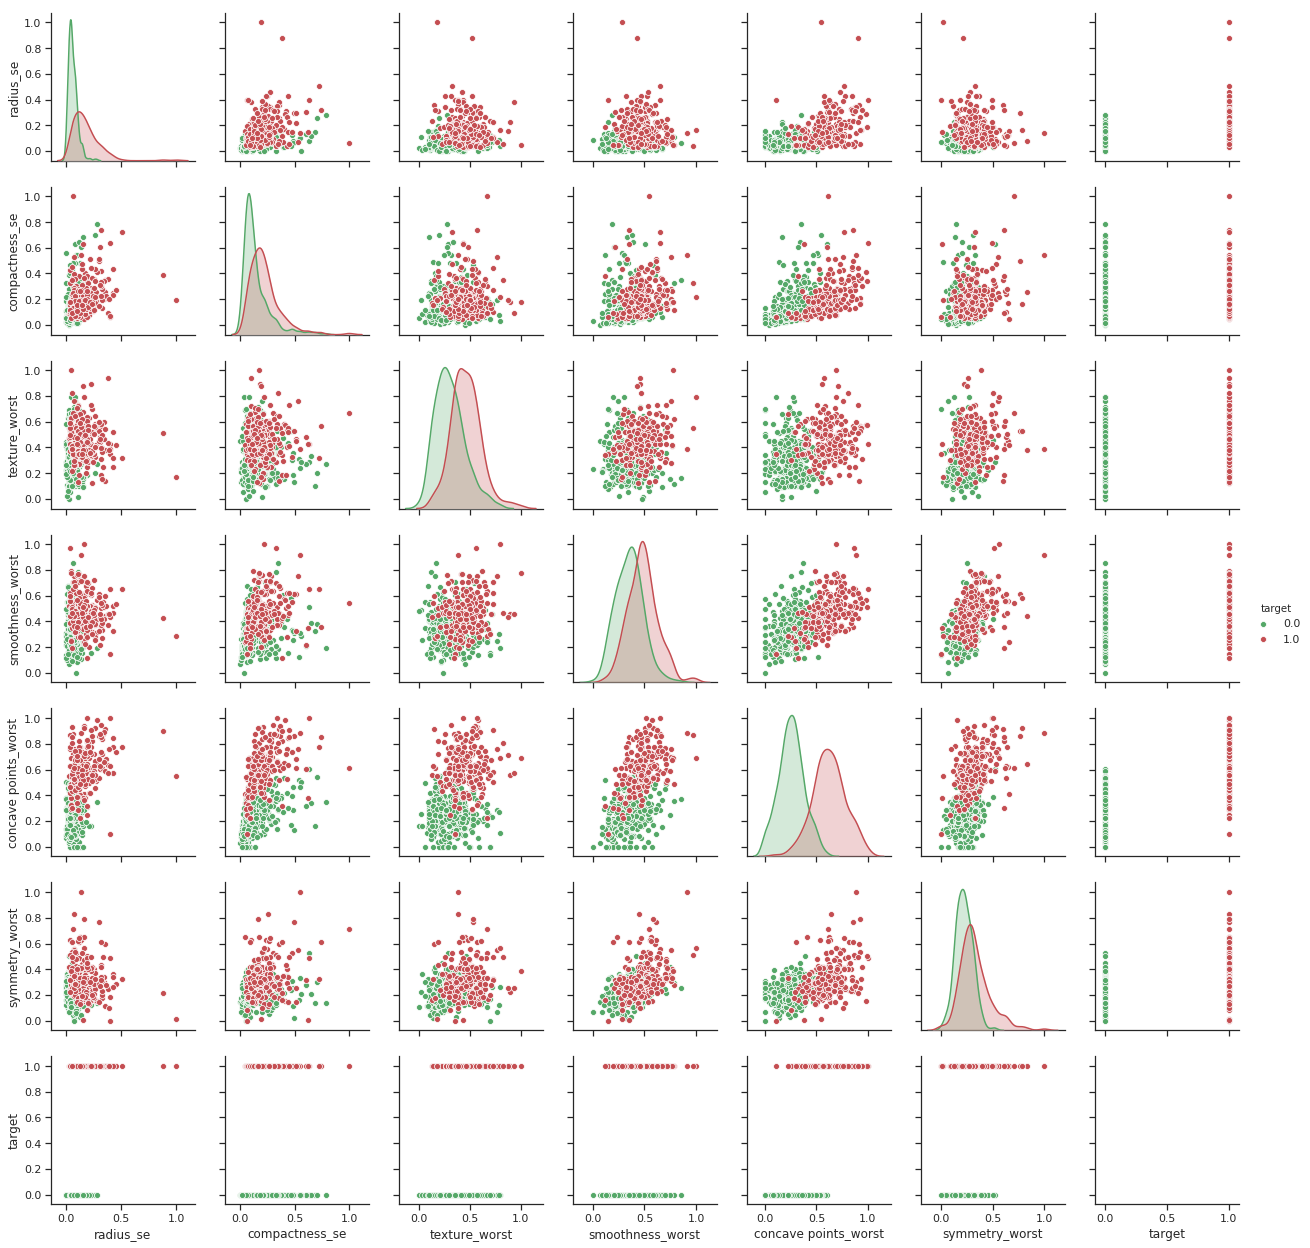

In [31]:
#import seaborn as sns
sns.set(style='ticks')
sns.pairplot(norm_sh[['radius_se', 
 #'texture_se',
 #'smoothness_se',
 'compactness_se',
 #'symmetry_se',
 'texture_worst',
 'smoothness_worst',
 'concave points_worst',
 'symmetry_worst',
 'target' ]], palette=('g', 'r'), hue='target')
plt.show

In [ ]:
#по главному признаку ('concave points_worst'), от которого максимально зависит target можно сказать, 
#что все что правее среднего значения - скорее плохой диагноз, а левее - скорее хороший.

/home/arseny/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/arseny/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


<function matplotlib.pyplot.show(*args, **kw)>

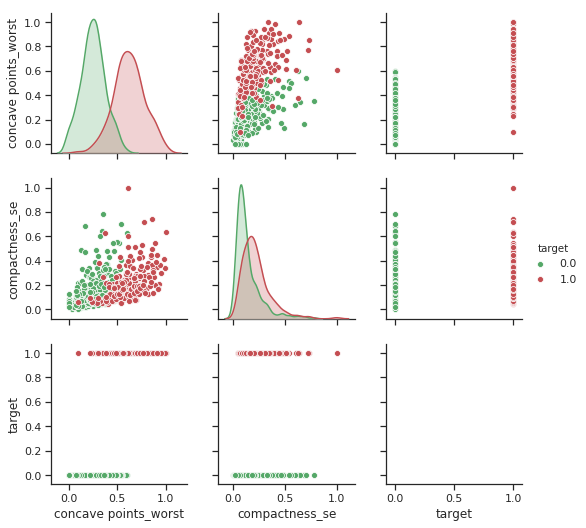

In [32]:
sns.set(style='ticks')
sns.pairplot(norm_sh[['concave points_worst', 'compactness_se', 'target']], \
             palette=('g', 'r'), hue='target')
plt.show

In [33]:
norm_df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.033318,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,...,0.363998,0.283138,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596,0.372583
std,0.137187,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,...,0.163813,0.167352,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466,0.483918
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000944,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,...,0.241471,0.167837,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700,0.000000
50%,0.000985,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,...,0.356876,0.235320,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977,0.000000
75%,0.009661,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,...,0.471748,0.373475,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 6. С помощью статистических методов проверить взаимосвязи между переменными.

In [34]:
#Нулевая гипотеза: 
#Средние значения плохих диагнозов одинаковые у пациентов с разным количеством 'concave points_worst'  
# Т.е. среднее значение плохих диагнозов не зависит от 'concave points_worst' . 
x=norm_df[norm_df['concave points_worst']>0.5]['target']
y=norm_df[norm_df['concave points_worst']<=0.5]['target']
print(len(x), len(y), np.mean(x), np.mean(y), np.std(x), np.std(y))
stats.ttest_ind(x, y)

183 386 0.9508196721311475 0.09844559585492228 0.21624435997168692 0.297916197128808


Ttest_indResult(statistic=34.56046097186699, pvalue=1.1148712346369408e-141)

In [ ]:
#Отвергаем нулевую гипотезу что средние одинаковы вне зависимости от 'concave points_worst' . 

In [ ]:

#По другому: протестируем коэффициенты линейной регрессии на равенство нулю

In [ ]:
# Нулевая гипотеза - коэффициенты линейной регресси при radius_se и texture_worst равны нулю

In [35]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

est = smf.ols("target ~ radius_se + texture_worst", norm_df).fit()
est_res = est.summary()
est_res.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-0.2693,0.038,-7.065,0.000,-0.344,-0.194
radius_se,2.3949,0.154,15.587,0.000,2.093,2.697
texture_worst,1.0637,0.094,11.293,0.000,0.879,1.249


In [ ]:
#р-value малы, значит коэффициенты не равны нулю и зависимость есть

## 7. Выбрать стратегию Feature Selection – сокращение размерности либо генерация новых переменных. Какой из этих
двух подходов даст лучший результат при классификации?

In [ ]:
#выбран путь сокращения размерности, т.к. датасет содержит мало записей, а фичей много. Есть риск переобучения

## 8. Провести стратегию Oversampling/Undersampling, проверить дает ли она улучшение результатов.

In [196]:
#x_train, x_test=

from sklearn.model_selection import train_test_split
#from sklearn.metrics import roc_auc_score, roc_curve
y= norm_df['target'].copy()
data_train, data_test, y_train, y_test = train_test_split(norm_df[predictors], y, test_size=0.2, random_state=10)

In [228]:
data_train.drop(columns='target', inplace=True)
data_test.drop(columns='target', inplace=True)

In [197]:
print(sorted(Counter(y).items()))
#[(0, 64), (1, 262), (2, 4674)]

[(0.0, 357), (1.0, 212)]


In [229]:
print(len(y_train), len(y_test), y_train.mean(), y_test.mean())

455 114 0.3802197802197802 0.34210526315789475


In [246]:
#data_train

In [ ]:
n_sampl=455

In [55]:
from collections import Counter
from sklearn.datasets import make_classification

#import scipy.cluster.hierarchy as hcluster

X, y = make_classification(n_samples=569, n_features=32, n_informative=2,
                            n_redundant=0, n_repeated=0, n_classes=2,
                            n_clusters_per_class=1,
                            weights=[0.3725, 0.6275],
                            class_sep=0.8, random_state=10)

In [72]:
from imblearn.under_sampling import ClusterCentroids
#cc = ClusterCentroids(sampling_strategy='auto', random_state=10)
cc = ClusterCentroids(#sampling_strategy=0.375, 
                      random_state=10)

#X_resampled, y_resampled = cc.fit_resample(data_train, y_train)
#X_resampled, y_resampled = cc.fit_resample(X, y)

#cc.fit(norm_df.drop(columns=['target']), norm_df['target'])
X_resampled, y_resampled = cc.fit_resample(data_train, y_train)

#norm_df['target']
print(sorted(Counter(y_resampled).items()))

[(0.0, 173), (1.0, 173)]


In [67]:
ClusterCentroids?

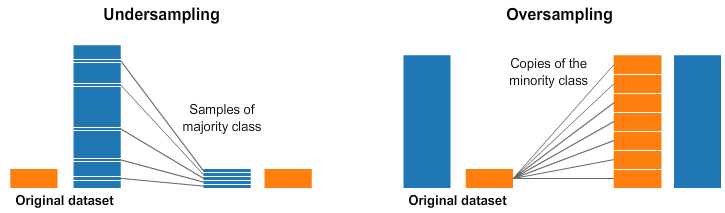

In [53]:
y.mean()
#y_resampled.mean()

0.37258347978910367

In [52]:
X_resampled

array([[0.00100581, 0.36012116, 0.43862022, ..., 0.37972509, 0.13660556,
        0.16397744],
       [0.00535795, 0.18997586, 0.1672303 , ..., 0.01908935, 0.23043564,
        0.05057064],
       [0.00094995, 0.22381561, 0.25295908, ..., 0.37766323, 0.19850187,
        0.10448642],
       ...,
       [0.00100735, 0.62232003, 0.62698681, ..., 0.55945017, 0.19850187,
        0.07431457],
       [0.00100765, 0.45525108, 0.62123774, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.00100797, 0.64456434, 0.66351031, ..., 0.91065292, 0.49714173,
        0.45231536]])

In [ ]:
# здесь пока не вышло

## 9. Сделать кросс-валидацию данных с использованием подхода K-fold (n_folds=10).

In [262]:
data=norm_df[predictors]#.drop(columns=['target'])
#y=
print(data.shape, data_train.shape, data_test.shape, y_train.shape, y_test.shape)

(569, 11) (455, 10) (114, 10) (455,) (114,)


In [233]:
from sklearn import svm

#clf = svm.SVC(kernel='linear', C=1).fit(data_train, y_train)
clf = svm.SVC(kernel='linear', C=1).fit(data, norm_df['target'])
print(clf.score(data_train, y_train), clf.score(data_test, y_test)) 

0.9472527472527472 0.956140350877193


In [234]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
#clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, norm_df.drop(columns=['target']), norm_df.target, cv=10)
scores

array([1.        , 0.96551724, 0.98245614, 0.98245614, 1.        ,
       0.96491228, 0.94736842, 1.        , 1.        , 0.96428571])

In [102]:
#kf = KFold(n_splits=10)
#for train, test in kf.split(data):
#    print("%s %s" % (train, test))
#    print("_")
#    data_train, data_test, y_train, y_test = X[train], X[test], y[train], y[test]
#    model.fit(data_train, y_train)

## 10. Рассчитать Feature Selection для выбранных переменных.

In [ ]:
#Выбрать те переменные которые по вашему мнению оптимальны для получения лучших результатов при тренировке модели


In [224]:
#выбраны в пункте 4

## 11. Решить задачу бинарной классификации и предсказать переменную ”Diagnosis ” протестировав как минимум 2
алгоритма. Использовать те алгоритмы, которые позволяют предсказать вероятность класса (proba). Рассчитать и
вывести вероятность каждого класса.

In [ ]:
#Logistic Regression, SVM, Random Forest, Gradient Boosting
#linear SVC, SVC, Kneighbour classifier, 

In [195]:
#data_train_sh=data_train[predictors]
#predictors
#data_train

array([[-0.63232056,  0.71624352, -1.24728726, ..., -0.77896214,
        -0.79349961, -0.36889652],
       [-0.12501911, -0.43873146, -1.54791067, ..., -2.34268123,
        -0.49275935,  0.90060003],
       [ 0.9636828 ,  0.09055206,  1.02324805, ...,  0.19187015,
        -0.3740256 , -0.63688477],
       ...,
       [ 0.12072631, -1.58887165, -1.18441246, ...,  1.04993754,
         1.19476942, -0.95971465],
       [-0.53690879,  0.75473682,  0.97557338, ...,  1.25278058,
         0.69321937,  0.51611688],
       [-0.13572778,  0.89809165,  1.64160334, ..., -0.4337811 ,
        -0.948696  ,  0.27268243]])

In [235]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
#from linear_model import LinearRegression
reg = LogisticRegression()
#reg = linear_model.LinearRegression()
reg.fit(data_train, y_train)
LogisticRegression(fit_intercept=True, n_jobs=None)
reg.coef_


/home/arseny/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[ 0.3714517 ,  3.3813314 , -0.5804465 , -0.59777402, -0.20525155,
        -0.83022715,  2.64018715,  0.28034135,  6.32492175,  0.95951185]])

In [314]:
#check of calculation probability
prod=0
coe=[ 0.3714517 ,  3.3813314 , -0.5804465 , -0.59777402, -0.20525155,
        -0.83022715,  2.64018715,  0.28034135,  6.32492175,  0.95951185]
b=list(data_test.iloc[0,  ])
for i in zip(coe,b, predictors):
    prod+=i[0]*i[1]
    #print(i, prod)
#print(np.dot(coe,b)+float(reg.intercept_))

#Probabiyty of y=1 for the 1st row of the test:
print(1/(1+np.exp(-1*(np.dot(coe,b)+float(reg.intercept_)))))
#b

0.6162053147278019


In [239]:
#reg.predict_proba(data_test).mean()#[:][:]
#reg.predict_proba(data_test)
#sum(reg.predict(data_test)-y_test)
for i in zip(y_test, reg.predict(data_test), reg.predict_proba(data_test)):
    print(i)
#reg.predict_proba(data_test)[:][:]

(1.0, 1.0, array([0.38379469, 0.61620531]))
(0.0, 0.0, array([0.96235754, 0.03764246]))
(0.0, 0.0, array([0.8890093, 0.1109907]))
(1.0, 1.0, array([0.08079716, 0.91920284]))
(0.0, 0.0, array([0.9026588, 0.0973412]))
(0.0, 0.0, array([0.5411651, 0.4588349]))
(0.0, 0.0, array([0.97375131, 0.02624869]))
(0.0, 0.0, array([0.77368965, 0.22631035]))
(1.0, 1.0, array([0.14368246, 0.85631754]))
(1.0, 1.0, array([0.21424678, 0.78575322]))
(0.0, 0.0, array([0.92827294, 0.07172706]))
(0.0, 0.0, array([0.88786122, 0.11213878]))
(1.0, 1.0, array([0.14512418, 0.85487582]))
(0.0, 0.0, array([0.88029906, 0.11970094]))
(1.0, 1.0, array([0.36849501, 0.63150499]))
(1.0, 1.0, array([0.27237919, 0.72762081]))
(0.0, 0.0, array([0.7742407, 0.2257593]))
(0.0, 0.0, array([0.80386862, 0.19613138]))
(0.0, 0.0, array([0.7804632, 0.2195368]))
(0.0, 0.0, array([0.85745607, 0.14254393]))
(1.0, 0.0, array([0.74338729, 0.25661271]))
(1.0, 1.0, array([0.36144544, 0.63855456]))
(0.0, 0.0, array([0.845066, 0.154934]))
(0

In [348]:
predict_proba_cl_0=np.mean(reg.predict_proba(data_test).reshape(2*len(y_test))[::2]) #P(y=0)
predict_proba_cl_1=np.mean(reg.predict_proba(data_test).reshape(2*len(y_test))[1::2]) #P(y=1)

#reg.predict_proba(data_test)[1::2]
#reg.predict_proba(data_test).reshape(2*len(y_test))[1::2]

AttributeError: module 'seaborn' has no attribute 'plt'

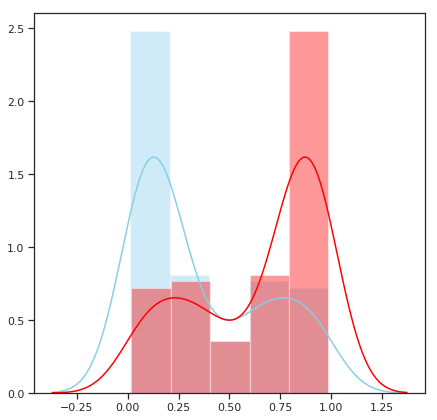

In [434]:
#df = sns.load_dataset('iris')
P_1=reg.predict_proba(data_test).reshape(2*len(y_test))[::2] 
P_0=reg.predict_proba(data_test).reshape(2*len(y_test))[1::2]
# Method 1: on the same Axis

f, axes = plt.subplots(1, 1, figsize=(7, 7), sharex=True)

sns.distplot( P_0 , color="skyblue", label="Predict_good_diagnosis")
sns.distplot( P_1 , color="red", label="Predict_bad_diagnosis")
sns.plt.legend()
 
sns.plt.show()

In [ ]:
#вероятности предсказания классов близки либо к 0 либо к 1. Значений посередине практически нет.

In [247]:
Accuracy=1-sum(abs(reg.predict(data_test)-y_test))/len(y_test)
#sum(abs(reg.predict(data_train)-y_train))/len(y_train)
#reg.predict(data_test)-y_test
Accuracy

0.956140350877193

In [253]:
Precision=sum(reg.predict(data_test)*y_test)/ \
    (sum(abs(reg.predict(data_test)*y_test))+sum(reg.predict(data_test)*(1-y_test)))
Precision

0.9473684210526315

In [255]:
Recall=sum(reg.predict(data_test)*y_test)/ \
    (sum(reg.predict(data_test)*y_test)+sum((1-reg.predict(data_test))*y_test))
Recall

0.9230769230769231

In [256]:
F1=2*Precision*Recall/(Precision+Recall)
F1

0.935064935064935

In [364]:
BS=sum((reg.predict_proba(data_test).reshape(2*len(y_test))[1::2]-y_test)**2)/len(y_test)
BS

0.06197004166106059

In [363]:
#BS_check
su=0
s=0
for i in zip(reg.predict_proba(data_test).reshape(2*len(y_test))[1::2],y_test, \
            reg.predict_proba(data_test).reshape(2*len(y_test))[1::2]-y_test, \
            (reg.predict_proba(data_test).reshape(2*len(y_test))[1::2]-y_test)**2):
    print(i)
    #print(i[3])
    su+=i[2]**2
    s+=1
print(su/114)

(0.6162053147717825, 1.0, -0.38379468522821747, 0.14729836040942654)
(0.037642458343805585, 0.0, 0.037642458343805585, 0.0014169546701651387)
(0.11099070390276343, 0.0, 0.11099070390276343, 0.012318936352830906)
(0.9192028359393851, 1.0, -0.08079716406061488, 0.006528181720237916)
(0.09734119669170808, 0.0, 0.09734119669170808, 0.009475308573373802)
(0.4588349044174086, 0.0, 0.4588349044174086, 0.2105294695117325)
(0.026248691846848766, 0.0, 0.026248691846848766, 0.0006889938236708248)
(0.22631034723145857, 0.0, 0.22631034723145857, 0.05121637326402335)
(0.8563175390144723, 1.0, -0.14368246098552773, 0.0206446495948577)
(0.7857532165195534, 1.0, -0.21424678348044657, 0.04590168423171735)
(0.0717270586635274, 0.0, 0.0717270586635274, 0.0051447709445211)
(0.11213878135566767, 0.0, 0.11213878135566767, 0.012575106283934238)
(0.8548758150345233, 1.0, -0.14512418496547674, 0.021061029061893905)
(0.11970094324213268, 0.0, 0.11970094324213268, 0.01432831581305627)
(0.6315049922802485, 1.0, -0

In [213]:
all_columns=norm_df[predictors].drop(columns=['target']).columns

In [258]:
len(all_columns)#.shape()#[texture_mean]

10

In [308]:
#Initialize a dataframe to store the results:
col = ['model','predict_proba_cl_0', 'predict_proba_cl_1', 'Accuracy', 'F1-Score', 'Precision', 'Recall', \
       'Brier Score', 'intercept'] \
    + ['coefx_%s' % i for i in all_columns]

#ind = ['model_pow_%d' % i for i in range(1, 16)]
ind = [i for i in range(17)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

In [377]:
#coef_matrix_simple.iloc[0, 0 ]='logreg_10_factors'
coef_matrix_simple.iloc[0, 0 ]='logreg_%d' % (len(predictors)-1) +'_factors'
coef_matrix_simple.iloc[0, 1 ]=predict_proba_cl_0
coef_matrix_simple.iloc[0, 2 ]=predict_proba_cl_1
coef_matrix_simple.iloc[0, 3 ]=Accuracy
coef_matrix_simple.iloc[0, 4 ]=F1
coef_matrix_simple.iloc[0, 5 ]=Precision
coef_matrix_simple.iloc[0, 6 ]=Recall
coef_matrix_simple.iloc[0, 7 ]=BS
coef_matrix_simple.iloc[0, 8 ]=reg.intercept_[0]
#for i in range(len(predictors)):
for i in range(len(all_columns)):
    #coef_matrix_simple.iloc[i - 1, 0:i + 2] = linreg.coef_[i]
    coef_matrix_simple.iloc[0, col.index('coefx_'+all_columns[i])] = reg.coef_[0][i]
    #print(col.index('coefx_'+all_columns[i]), reg.coef_[0][i])

In [378]:
#'logreg_%d' % (len(predictors)-1) +'_factors'

In [435]:
coef_matrix_simple.head(1).T#.shape

,0
model,logreg_10_factors
predict_proba_cl_0,0.644471
predict_proba_cl_1,0.355529
Accuracy,0.95614
F1-Score,0.935065
Precision,0.947368
Recall,0.923077
Brier Score,0.06197
intercept,-4.43101
coefx_id,0.371452


In [418]:
from sklearn.neighbors import KNeighborsClassifier
n_neigh=4
neigh = KNeighborsClassifier(n_neighbors=n_neigh)
neigh.fit(data_train, y_train) 
KNeighborsClassifier(...)

#print(neigh.predict([[1.1]]))
#[0]
#print(neigh.predict_proba([[0.9]]))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=Ellipsis, p=2,
           weights='uniform')

In [420]:
#neigh.predict_proba(data_test)

In [421]:
Accuracy_neigh=1-sum(abs(neigh.predict(data_test)-y_test))/len(y_test)

Precision_neigh=sum(neigh.predict(data_test)*y_test)/ \
    (sum(abs(neigh.predict(data_test)*y_test))+sum(neigh.predict(data_test)*(1-y_test)))

In [422]:
Recall_neigh=sum(neigh.predict(data_test)*y_test)/ \
    (sum(neigh.predict(data_test)*y_test)+sum((1-neigh.predict(data_test))*y_test))

F1_neigh=2*Precision_neigh*Recall_neigh/(Precision_neigh+Recall_neigh)

In [423]:
BS_neigh=sum((neigh.predict_proba(data_test).reshape(2*len(y_test))[1::2]-y_test)**2)/len(y_test)
#BS_neigh

predict_proba_cl_0_neigh=np.mean(neigh.predict_proba(data_test).reshape(2*len(y_test))[::2]) #P(y=0)
predict_proba_cl_1_neigh=np.mean(neigh.predict_proba(data_test).reshape(2*len(y_test))[1::2]) #P(y=1)

In [415]:
#print(Accuracy_neigh, Precision_neigh, Recall_neigh, F1_neigh, BS_neigh)

In [426]:
j=2
#coef_matrix_simple.iloc[j, 0 ]='logreg_%d' % (n_neigh) +'_factors'
coef_matrix_simple.iloc[j, 0 ]=str(n_neigh)+'_Nearest_Neighbours'
coef_matrix_simple.iloc[j, 1 ]=predict_proba_cl_0_neigh
coef_matrix_simple.iloc[j, 2 ]=predict_proba_cl_1_neigh
coef_matrix_simple.iloc[j, 3 ]=Accuracy_neigh
coef_matrix_simple.iloc[j, 4 ]=F1_neigh
coef_matrix_simple.iloc[j, 5 ]=Precision_neigh
coef_matrix_simple.iloc[j, 6 ]=Recall_neigh
coef_matrix_simple.iloc[j, 7 ]=BS_neigh


In [427]:
coef_matrix_simple.head(5).T

,0,1,2,3,4
model,logreg_10_factors,3_Nearest_Neighbours,4_Nearest_Neighbours,NaN,NaN
predict_proba_cl_0,0.644471,0.678363,0.671053,NaN,NaN
predict_proba_cl_1,0.355529,0.321637,0.328947,NaN,NaN
Accuracy,0.95614,0.947368,0.947368,NaN,NaN
F1-Score,0.935065,0.921053,0.918919,NaN,NaN
Precision,0.947368,0.945946,0.971429,NaN,NaN
Recall,0.923077,0.897436,0.871795,NaN,NaN
Brier Score,0.06197,0.0477583,0.0482456,NaN,NaN
intercept,-4.43101,NaN,NaN,NaN,NaN
coefx_id,0.371452,NaN,NaN,NaN,NaN


In [ ]:
'texture_mean', 'perimeter_mean', 'concave points_mean', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
       'concavity_worst', 'concave points_worst'

## 12. Проверить качество классификации с использованием следующих метрик: Accuracy, F1-Score, Precision, Recall

In [ ]:
# выше

## 13. Проверить качество вероятности класса с использованием метрики: Brier Score

In [ ]:
#выше

## 14. * Осуществить запуск вашего скрипта с использованием Docker.

In [ ]:
#пока не возьмусь

## 15. Загрузить результат (в формате .ipynb ноутбука либо докер реализации) в репозиторий. Разместить ссылку в лк

In [ ]:
#done